# 각 resource에 존재하는 함수 호출
## 1) src_1
#### - perspective_transform : 원근변환

## 2) src_2
#### - size_measure_google : 구글 지도를 활용한 실제 거리 계산
#### - size_measure_naver : 네이버 지도를 활용한 실제 거리 계산

## 3) src_3
#### - max_contour : 최대 면적 폐곡선을 활용한 건물, 창문 영역 구분 방식
#### - near_point : 꼭지점에서 가까운 점을 활용한 건물, 창문 영역 구분 방식(1차년도)
#### - fused : 건물 max contour, 창문 max contour 이후 near point를 적용한 방식
#### - bimdoal_analysis : 온도 분포 분석을 바탕으로 한 열 누수 비교탐지 방식
#### - deltaT_analysis : 창 내/외부 평균 온도 비교를 바탕으로 한 열 누수 비교 탐지 방식

In [1]:
from src_1 import perspective_transform
from src_2 import size_measure_google, size_measure_naver
from src_3 import max_contour, near_point, fused, bimdoal_analysis, deltaT_analysis

## 원근변환 함수 실행 이후 작동법

#### 1) 작업표시줄에 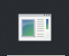 아이콘 클릭 (창이 떠있으면 다음으로)



#### 2) 원근변환 이전 이미지에서 4개의 점 선택 >>> 스페이스바 입력

  *주의점* : 11시(북서) -> 1시(북동) -> 7시(남서) -> 5시(남동) 순으로 무조건 선택

#### 3) 새로나온 end point selection 창에서 "양끝점 선택" >>> 스페이스바 입력

  *주의점* : 직선 거리에 해당하는 픽셀 수 계산을 위한 단계로 양끝점 2개 선택

In [2]:
# perspective_transform(input 이미지 주소 입력)
line_px = perspective_transform('./data_raw/cap5.jpg')

직선에 존재하는 픽셀 수 : 983
변환 이미지 저장 : ./data/cap5.jpg


###################################################

## Object detection, Edge detection 함수 실행 방법 (터미널, Terminal 실행)

### 1) Object detection - YOLO V4






### 2) Edge detection - HED
 - pytorch-hed-master 폴더 경로 진입
 
```
cd C://Users/HEESUNG/workspace/0.project/demo/pytorch-hed-master
```

 - python hed_run.py --arguments_strModel bsds500 --arguments_strIn [input 경로] --arguments_strOut [output 저장경로, data_res 폴더]

```
python hed_run.py --arguments_strModel bsds500 --arguments_strIn C://Users/HEESUNG/workspace/0.project/demo/data/cap5.jpg --arguments_strOut C://Users/HEESUNG/workspace/0.project/demo/data_res/cap5_hed.png
```

### 3) Edge detection - DexiNed

 - DexiNed-master 폴더 경로 진입
 
```
cd C://Users/HEESUNG/workspace/0.project/demo/DexiNed-master
```

 - python main.py --choose_test_data=-1 --output_dir=[저장경로]
 
```
python main.py --choose_test_data=-1 --output_dir=C://Users/HEESUNG/workspace/0.project/demo/data_res
```

###################################################

## 지도에서 실제 거리 계산

##  1) 크롬 웹 드라이버 유의사항

#### - 크롬 웹 드라이버 버전에 맞게 py파일과 같은 path에 다운로드 해야함.
#### - 크롬 업데이트시 크롬 웹 드라이버도 버전에 맞게 업데이트 해야함.
#### - 크롬 버전은 설정 - Chrome 정보에서 확인 가능
#### - https://chromedriver.chromium.org/downloads (드라이버 다운로드 위치)



## 2) 지도를 활용하여 실제 거리 계산하는 방법

#### - 구글 혹은 네이버 중 원하는 함수 실행
#### - 정확한 주소 입력 후 우클릭하여 '거리측정' 선택하여 촬영 위치 직선 선택
#### - 정확한 위치 선택했는지 확인 후 창 종료

In [3]:
line_m = float(size_measure_google())
#line_m = size_measure_naver()

m_per_px = line_m/line_px
m2_per_px = m_per_px * m_per_px

print('직선거리 내 픽셀 수 : {}'.format(line_px))
print('직선거리 내 실제 거리 : {}'.format(line_m))
print(' > 픽셀 당 거리 : {} (m/px)'.format(m_per_px))
print(' > 픽셀 당 넓이 : {} (m^2/px)'.format(m2_per_px))

직선거리 내 픽셀 수 : 983
직선거리 내 실제 거리 : 44.54
 > 픽셀 당 거리 : 0.04531027466937945 (m/px)
 > 픽셀 당 넓이 : 0.002053020990614609 (m^2/px)


# 건물, 창문 영역 분할
#### - max_contour : 엣지 폐곡선 찾는 방식(신규)
#### - near_point : 꼭지점에서 4개의 근접점 찾는 방식(기존)
#### - mixed : 건물에는 max_contour / 창문에는 max_contour 이후 near_point 적용
#### - 3개 함수 모두 './data_edge_eval/2.jpg'의 형태로 입력
#### - **주의점** dexined, hed, object detection 결과 모두 한 폴더에 있어야함

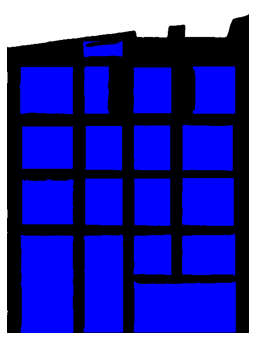

창문 : 168230
외벽 : 129220
배경 : 29730


In [4]:
maxcontour, blue_1, black_1, white_1 = max_contour('./data_edge_eval/2.jpg', show=True)

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:09<00:00,  1.93it/s]


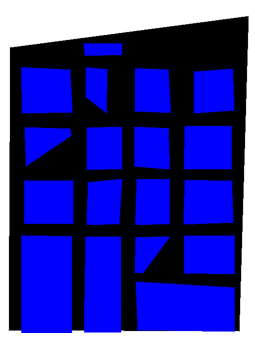

창문 : 147379
외벽 : 143183
배경 : 36618


In [5]:
nearpoint, blue_2, black_2, white_2 = near_point('./data_edge_eval/2.jpg', True)

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [02:54<00:00,  9.68s/it]


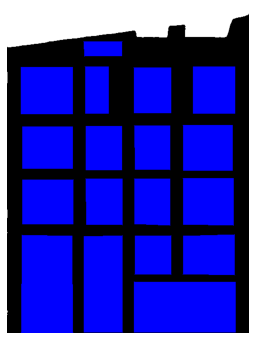

창문 : 168853
외벽 : 128597
배경 : 29730


In [6]:
fused, blue_3, black_3, white_3 = fused('./data_edge_eval/2.jpg', True)

In [7]:
# 픽셀당 넓이(m^2/px)
# m2_per_px = 0.002020484447831487

print('[1. Max Contour 결과], (단위 : m^2)')
print('창문 : {:.3f} \n외벽 : {:.3f}\n배경 : {:.3f}'.format(
    len(blue_1)*m2_per_px, len(black_1)*m2_per_px, len(white_1)*m2_per_px))

print('\n[2. Near Point 결과], (단위 : m^2)')
print('창문 : {:.3f} \n외벽 : {:.3f}\n배경 : {:.3f}'.format(
    len(blue_2)*m2_per_px, len(black_2)*m2_per_px, len(white_2)*m2_per_px))

print('\n[3. Fused 결과], (단위 : m^2)')
print('창문 : {:.3f} \n외벽 : {:.3f}\n배경 : {:.3f}'.format(
    len(blue_3)*m2_per_px, len(black_3)*m2_per_px, len(white_3)*m2_per_px))

[1. Max Contour 결과], (단위 : m^2)
창문 : 345.380 
외벽 : 265.291
배경 : 61.036

[2. Near Point 결과], (단위 : m^2)
창문 : 302.572 
외벽 : 293.958
배경 : 75.178

[3. Fused 결과], (단위 : m^2)
창문 : 346.659 
외벽 : 264.012
배경 : 61.036


# 열 누수 탐지

## 1) 열이상이 존재하는 영역의 온도 분포는 Bimodal의 형태를 보인다는 이론을 바탕으로한 분석 방식

C:\Users\HEESUNG\workspace\0.project\demo\src_3.py:150: RuntimeWarning: overflow encountered in ubyte_scalars
  if 100<list(img_arr[y_][x_])[0]+list(img_arr[y_][x_])[1]+list(img_arr[y_][x_])[2]<300:


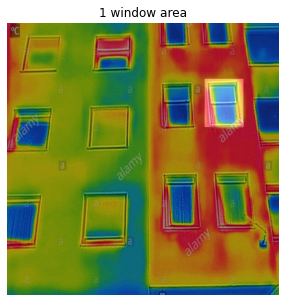

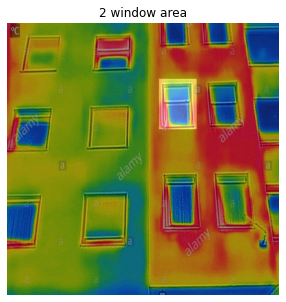

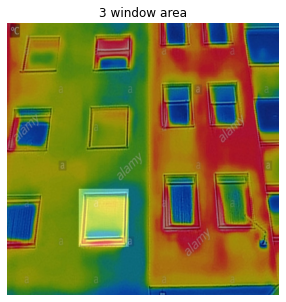

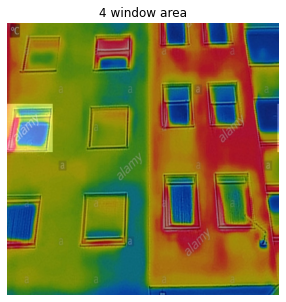

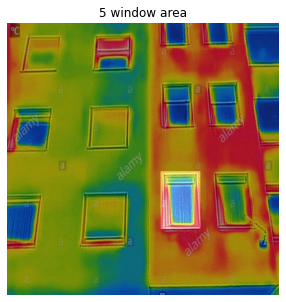

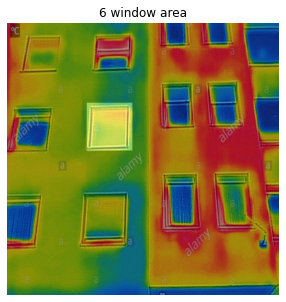

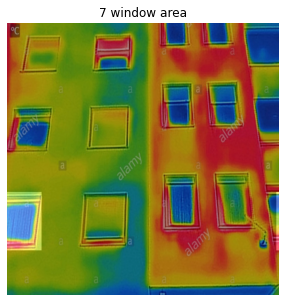

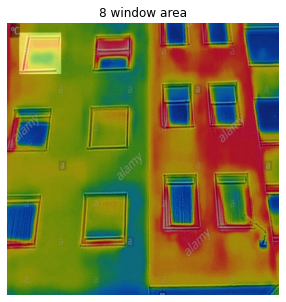

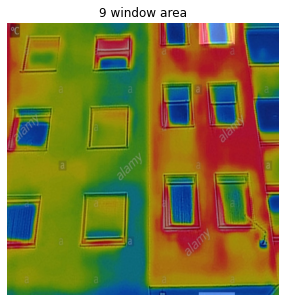

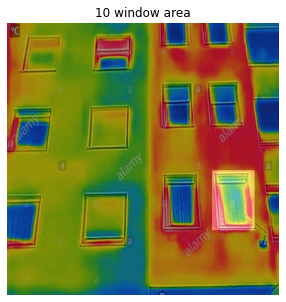

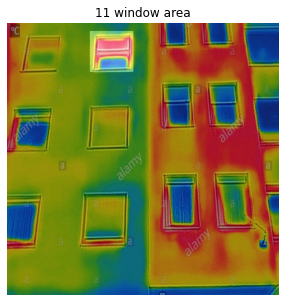

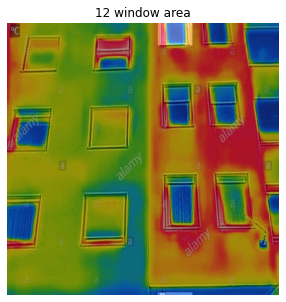

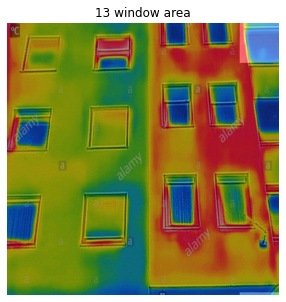

threshold : 171


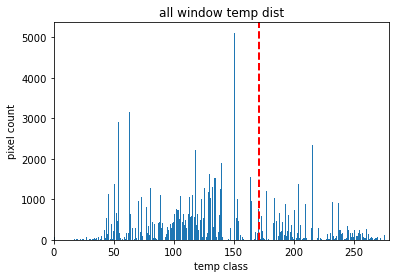

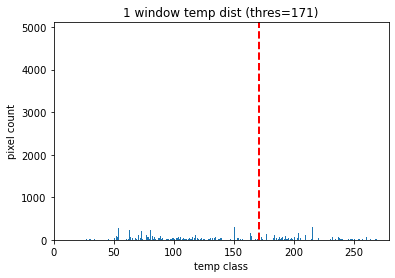

[Threshold 기반 분석]
이상 픽셀 수 : 2281
이상 픽셀 비율 : 34.337


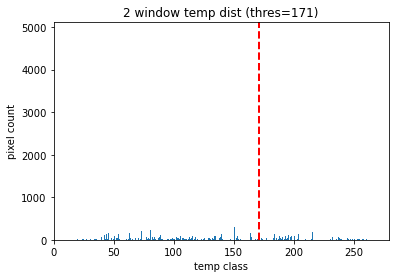

[Threshold 기반 분석]
이상 픽셀 수 : 2056
이상 픽셀 비율 : 30.482


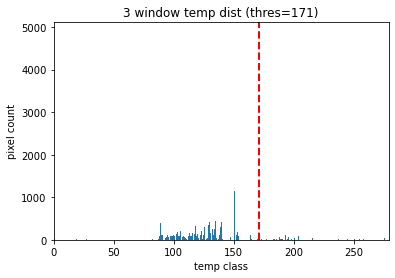

[Threshold 기반 분석]
이상 픽셀 수 : 767
이상 픽셀 비율 : 7.486


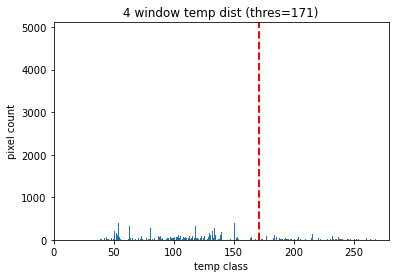

[Threshold 기반 분석]
이상 픽셀 수 : 1603
이상 픽셀 비율 : 19.793


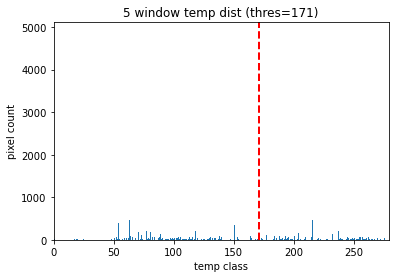

[Threshold 기반 분석]
이상 픽셀 수 : 3186
이상 픽셀 비율 : 38.972


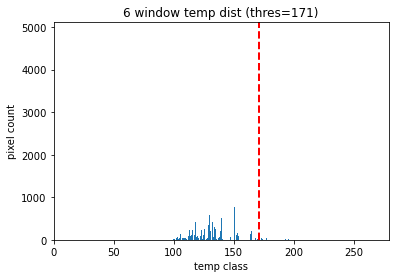

[Threshold 기반 분석]
이상 픽셀 수 : 268
이상 픽셀 비율 : 3.463


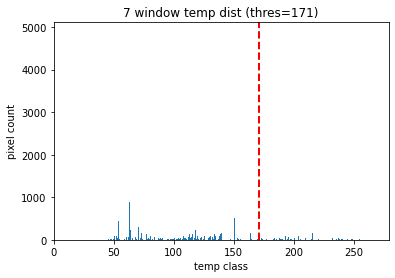

[Threshold 기반 분석]
이상 픽셀 수 : 1076
이상 픽셀 비율 : 13.974


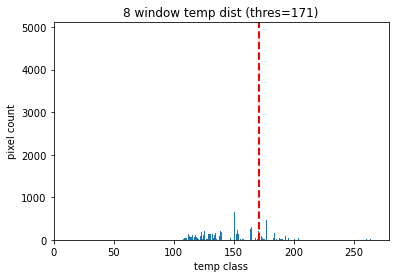

[Threshold 기반 분석]
이상 픽셀 수 : 1371
이상 픽셀 비율 : 22.249


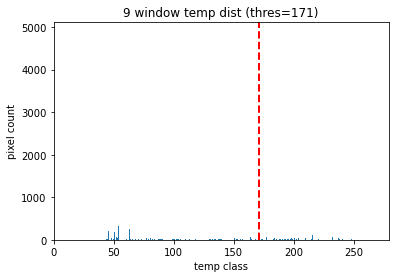

[Threshold 기반 분석]
이상 픽셀 수 : 973
이상 픽셀 비율 : 31.797


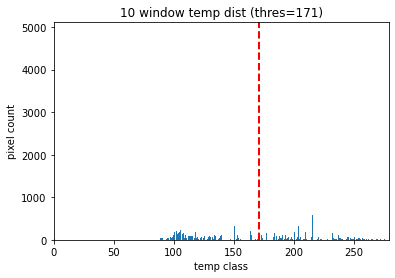

[Threshold 기반 분석]
이상 픽셀 수 : 4179
이상 픽셀 비율 : 46.228


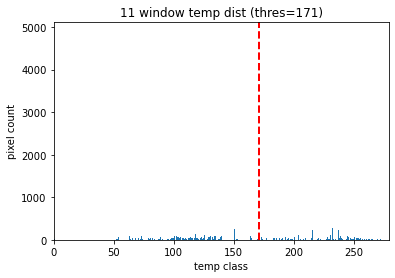

[Threshold 기반 분석]
이상 픽셀 수 : 2801
이상 픽셀 비율 : 44.362


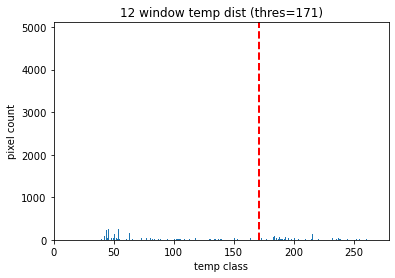

[Threshold 기반 분석]
이상 픽셀 수 : 1022
이상 픽셀 비율 : 33.453


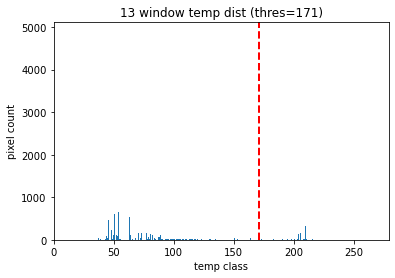

[Threshold 기반 분석]
이상 픽셀 수 : 858
이상 픽셀 비율 : 14.493


In [8]:
bimdoal_analysis('./data_heatloss/0002.jpg')

# Delta T

In [9]:
delta_0002 = deltaT_analysis('./data_heatloss/0002.jpg')

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:59<00:00,  4.60s/it]

Delta T analysis
 - 0 window : -73.954
 - 1 window : -62.402
 - 2 window : 8.762
 - 3 window : -24.778
 - 4 window : -73.451
 - 5 window : 20.422
 - 6 window : -26.902
 - 7 window : 1.752
 - 8 window : -68.350
 - 9 window : -41.305
 - 10 window : 52.451
 - 11 window : -81.659
 - 12 window : -98.804
